In [1]:
import pandas as pd
%matplotlib inline

/home/am/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
%%bash
ls

ethiopia
ethiopia.geojson
LANDSAT_8_C1_383244.csv
NDVI_SWEthiopia_with_Mosaic.ipynb
RasterVision.ipynb
SENTINEL_2A_382286.csv
Sentinel2A_Landsat8_comparison.ipynb
sentinel2MetaDataExtract.ipynb
Untitled.ipynb


### Landsat-8

In [3]:
pd.read_csv('LANDSAT_8_C1_383244.csv').columns

Index(['Landsat Product Identifier', 'Landsat Scene Identifier',
       'Acquisition Date', 'Collection Category', 'Collection Number',
       'WRS Path', 'WRS Row', 'Target WRS Path', 'Target WRS Row',
       'Nadir/Off Nadir', 'Roll Angle', 'Date L-1 Generated', 'Start Time',
       'Stop Time', 'Station Identifier', 'Day/Night Indicator',
       'Land Cloud Cover', 'Scene Cloud Cover', 'Ground Control Points Model',
       'Ground Control Points Version', 'Geometric RMSE Model (meters)',
       'Geometric RMSE Model X', 'Geometric RMSE Model Y', 'Image Quality',
       ' Processing Software Version', 'Sun Elevation L1', 'Sun Azimuth L1',
       'TIRS SSM Model', 'Data Type Level-1', 'Sensor Identifier',
       'Panchromatic Lines', 'Panchromatic Samples', 'Reflective Lines',
       'Reflective Samples', 'Thermal Lines', 'Thermal Samples',
       'Map Projection Level-1', 'UTM Zone', 'Datum', 'Ellipsoid',
       'Grid Cell Size Panchromatic', 'Grid Cell Size Reflective',
       'Grid

In [4]:
landsatMetaData = pd.read_csv('LANDSAT_8_C1_383244.csv',
                             usecols=['Acquisition Date',
                                      'Scene Cloud Cover', 
                                      'Landsat Scene Identifier'
                                     ],
                              parse_dates=['Acquisition Date'],
                              date_parser= lambda x: pd.to_datetime(x).date 
                             )
landsatMetaData = landsatMetaData.rename(columns={'Acquisition Date':'Date', 'Landsat Scene Identifier':'Scene', 'Scene Cloud Cover':'Landsat8 CCP'})
landsatMetaData = landsatMetaData.assign(Date= landsatMetaData['Date'].dt.strftime('%m-%Y'))
# landsatMetaData.columns

In [5]:
landsatMetaData.head()
landsatMetaData['Date'].unique()
# sth = landsatMetaData.set_index('Year','Month')
# landsatMetaData

array(['01-2020', '12-2019', '11-2019', '10-2019', '09-2019', '08-2019',
       '07-2019', '06-2019', '05-2019', '04-2019', '03-2019', '02-2019',
       '01-2019', '12-2018', '11-2018', '10-2018', '09-2018', '08-2018',
       '07-2018', '06-2018', '05-2018', '04-2018', '03-2018', '02-2018',
       '01-2018', '12-2017', '11-2017', '10-2017', '09-2017', '08-2017',
       '07-2017', '06-2017', '05-2017', '04-2017', '03-2017', '02-2017',
       '01-2017', '12-2016', '11-2016', '10-2016', '09-2016', '08-2016',
       '07-2016', '06-2016', '05-2016', '04-2016', '03-2016', '02-2016',
       '01-2016', '12-2015', '11-2015', '10-2015', '09-2015', '08-2015',
       '07-2015', '06-2015', '05-2015', '04-2015', '03-2015', '02-2015',
       '01-2015', '12-2014', '11-2014', '10-2014', '09-2014', '08-2014',
       '07-2014', '06-2014', '05-2014', '04-2014', '03-2014', '02-2014',
       '01-2014', '12-2013', '11-2013', '10-2013', '09-2013', '08-2013',
       '07-2013', '06-2013', '05-2013', '04-2013', 

In [6]:
lsg = pd.DataFrame(landsatMetaData.groupby('Date')['Landsat8 CCP'].mean())
lsg.index.names

FrozenList(['Date'])

### Sentinel-2A

In [7]:
pd.read_csv('SENTINEL_2A_382286.csv').columns

Index(['Entity ID', 'Acquisition Start Date', 'Acquisition End Date',
       'Tile Number', 'Cloud Cover', 'Agency', 'Platform', 'Vendor',
       'Vendor Tile ID', 'Orbit Number', 'Orbit Direction',
       'Vendor Software Version', 'Production Date', 'Vendor Product ID',
       'Archiving Center', 'Datatake Type', 'Datatake Identifier', 'Data Type',
       'Product Type', 'Product Format', 'Processing Level', 'Datastrip ID',
       'Datum', 'Map Projection', 'UTM Zone', 'EPSG Code', 'Resolution',
       'Units', 'Sun Zenith Angle Mean', 'Sun Azimuth Angle  Mean',
       'Quantification', 'Center Latitude', 'Center Longitude',
       'NW Corner Lat', 'NW Corner Long', 'NE  Corner Lat', 'NE  Corner Long',
       'SE Corner Lat', 'SE Corner Long', 'SW Corner Lat', 'SW Corner Long',
       'Center Latitude dec', 'Center Longitude dec', 'NW  Corner Lat dec',
       'NW Corner Long dec', 'NE Corner Lat dec', 'NE Corner Long dec',
       'SE Corner Lat dec', 'SE Corner Long dec', 'SW Corner 

In [8]:
sentMetaData = pd.read_csv('SENTINEL_2A_382286.csv',
                  usecols=['Acquisition End Date',
                           'Tile Number', 
                           'Cloud Cover'
                          ], 
                  parse_dates=['Acquisition End Date'], 
                  date_parser = lambda x: pd.to_datetime(x).date
                  )
sentMetaData = sentMetaData.rename(columns={'Acquisition End Date':'Date','Cloud Cover':'Sentinel2A CCP'})
sentMetaData = sentMetaData.assign(Date= sentMetaData['Date'].dt.strftime('%m-%Y'))
sentMetaData.columns

Index(['Date', 'Tile Number', 'Sentinel2A CCP'], dtype='object')

In [10]:
sg = pd.DataFrame(sentMetaData.groupby('Date')['Sentinel2A CCP'].mean())
sg

,Sentinel2A CCP
Date,
01-2018,6.223976
01-2019,1.365390
02-2018,18.631887
03-2018,22.702698
04-2018,39.964785
05-2018,37.800339
06-2018,36.482804
07-2018,34.761767
08-2018,29.777463


In [11]:
comp = sg.merge(lsg, left_index=True, right_index=True)
comp

,Sentinel2A CCP,Landsat8 CCP
Date,,
01-2018,6.223976,6.220224
01-2019,1.365390,4.590400
02-2018,18.631887,14.585932
03-2018,22.702698,19.433492
04-2018,39.964785,41.220556
05-2018,37.800339,33.678450
06-2018,36.482804,49.639360
07-2018,34.761767,55.383209
08-2018,29.777463,47.100317


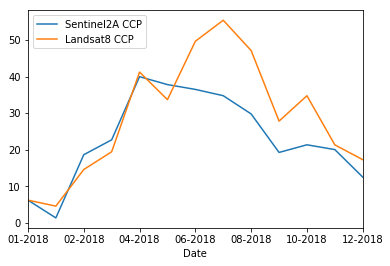

In [12]:
comp.plot()